In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SEED = 150 
np.random.seed(SEED)

### Create data point frame

#### Sample test

In [250]:
num_points_per_class = 20

data = []
for class_label in range(5):
    x = np.random.normal(loc=class_label * 3, scale=1.0, size=num_points_per_class)
    y = np.random.normal(loc=class_label * 3, scale=1.0, size=num_points_per_class)
    data.append(pd.DataFrame({'x': x, 'y': y, 'class': class_label}))

df = pd.concat(data, ignore_index=True)
df.loc[30:35]

,x,y,class
30,3.409266,3.854132,1
31,2.333713,0.909035,1
32,2.335937,2.426119,1
33,2.747045,2.058494,1
34,4.237296,3.133537,1
35,3.001788,2.802697,1


#### Function Building

In [251]:
def create_data_point(num_class = 5, num_points_per_class = 20):
    data = []
    for class_label in range(num_class):
        x = np.random.normal(loc=class_label * 3, scale=1.0, size=num_points_per_class)
        y = np.random.normal(loc=class_label * 3, scale=1.0, size=num_points_per_class)
        data.append(pd.DataFrame({'x': x, 'y': y, 'class': class_label}))
    
    df = pd.concat(data, ignore_index=True)
    return df

### Visualize data frame

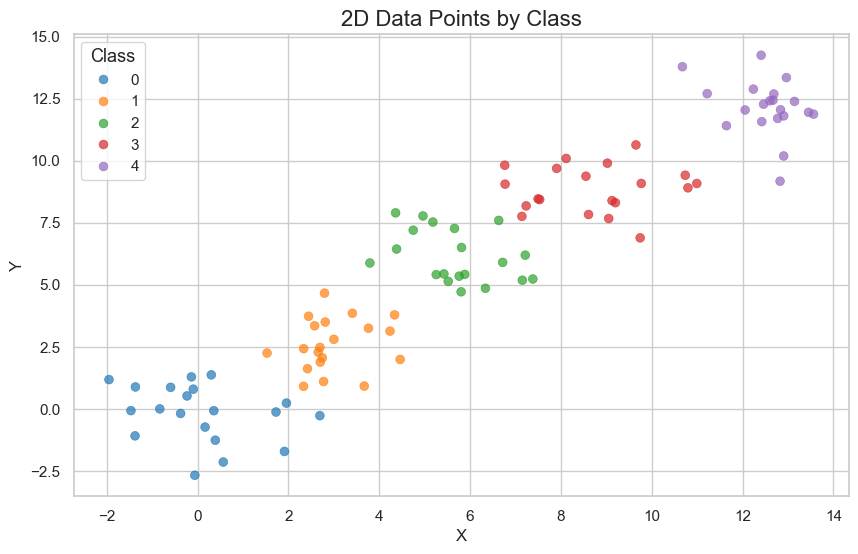

In [252]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=40, alpha=0.7, edgecolor=None)

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

### Randomly Create Sample for clustering

#### Sample test

In [253]:
np.random.seed(10)
outlier_x = np.random.uniform(low=df['x'].min() , high=df['x'].max())
outlier_y = np.random.uniform(low=df['y'].min() , high=df['y'].max() )
outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

outlier_df.to_numpy()[0][0]

10.01416430301394

#### Function Building 

In [254]:
def create_sample(df: pd.DataFrame)->tuple[float, float]:
    outlier_x = np.random.uniform(low=df['x'].min() , high=df['x'].max())
    outlier_y = np.random.uniform(low=df['y'].min() , high=df['y'].max() )
    outlier_df = pd.DataFrame({'x': [outlier_x], 'y': [outlier_y], 'class': ['outlier']})

    
    return (outlier_df.to_numpy()[0][0],outlier_df.to_numpy()[0][1])

### Visualize randomly point

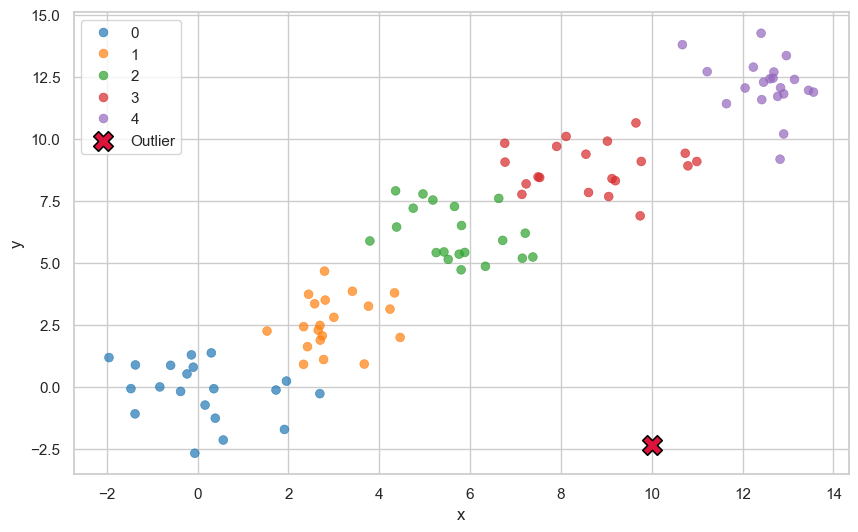

In [255]:
df_combined = pd.concat([df, outlier_df], ignore_index=True)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=40, alpha=0.7, edgecolor=None)
sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                marker='X', label='Outlier', edgecolor='black')

plot.set_title('2D Data Points by Class', fontsize=16)
plot.set_xlabel('X', fontsize=12)
plot.set_ylabel('Y', fontsize=12)
plot.legend(title='Class', title_fontsize='13', fontsize='11')

plt.show()

### Calcualte Distance (Euclien Distance)

In [256]:
x_point = df.to_numpy()[:, 0]
y_point = df.to_numpy()[:, 1]
class_point = df.to_numpy()[:, 2].astype(np.uint8)
class_point

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=uint8)

In [257]:
p_sample_x = outlier_df.loc[0,'x']
p_sample_y = outlier_df.loc[0,'y']
print(f'point_x: {p_sample_x} | point_y: {p_sample_y}')

point_x: 10.01416430301394 | point_y: -2.3230492885366476


##### Find out distances and sorting

In [279]:
distance_matrix = np.sqrt((x_point-p_sample_x)**2 + (p_sample_y-p_sample_y))
distance_matrix_sorted = np.sort(distance_matrix)
distance_matrix_sorted

array([ 0.24528056,  0.26942459,  0.36276598,  0.65997895,  0.72302382,
        0.78209333,  0.81487134,  0.88912347,  0.96173503,  0.97741619,
        0.99080529,  1.20618934,  1.40589357,  1.46345609,  1.63023526,
        1.89942285,  2.04116087,  2.10793351,  2.22218911,  2.39328027,
        2.40743446,  2.44782483,  2.4813848 ,  2.5170061 ,  2.58679893,
        2.63226353,  2.65545896,  2.67318026,  2.75792283,  2.77994161,
        2.79904581,  2.81040429,  2.82161704,  2.86353178,  2.87327406,
        2.89013807,  2.89053882,  2.94957825,  3.12829815,  3.24369462,
        3.25119698,  3.29617306,  3.38306218,  3.43821506,  3.54702571,
        3.67600305,  4.13145478,  4.20225064,  4.21126677,  4.25417672,
        4.35698406,  4.49513367,  4.58970182,  4.75954853,  4.83339198,
        5.05084492,  5.26580003,  5.55416507,  5.63224054,  5.65378504,
        5.67712121,  5.77686879,  6.21987835,  6.25084203,  6.34370803,
        6.60489812,  7.01237675,  7.20259351,  7.21911743,  7.23

In [259]:
k_indice = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:8]]
k_indice
print(f'Class belong to: {class_point[k_indice]}')

set_indice = set(class_point[k_indice])
print(f'set indicate: {set_indice}')
repeat = [list(class_point[k_indice]).count(x) for x in set_indice]
print(f'repeat: {repeat}')
indice_max = np.array(repeat).argmax()
print(f'max indicator: {indice_max}')
print(f'class belong to: {(list(set_indice))[indice_max]}')

Class belong to: [3 3 3 4 3 3 3 3]
set indicate: {3, 4}
repeat: [7, 1]
max indicator: 0
class belong to: 3


### Build up knn classifier 

In [282]:
class knn_classifier:
    """
    * Input: 
        * data_point(data_point:pd.DataFram) column 0: 'x', column 1: 'y', column3: 'class'
        data_point(np.array) column 0: 'x', column 1: 'y', column3: 'class'
        * random point(tuple): (x, y)
        * distance
    * Return class with highest probability
    
    """
    def __init__(self, 
                df:pd.DataFrame, 
                distance = "euclidean" ,
                k  = 5):
        
        self.k = k 
        self.df = df

        self.x_point = df.to_numpy()[:, 0]
        self.y_point = df.to_numpy()[:, 1]
        self.class_point = df.to_numpy()[:, 2].astype(np.uint8)
        self.distance = distance
    def __visualize (self,point_sample):

        outlier_df = pd.DataFrame({'x': [point_sample[0]], 'y': [point_sample[1]], 'class': ['outlier']})

        df_combined = pd.concat([self.df, outlier_df], ignore_index=True)
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        plot = sns.scatterplot(data=df, x='x', y='y', hue='class', palette='tab10', s=40, alpha=0.7, edgecolor=None)
        plot = sns.scatterplot(data=df_combined[df_combined['class'] == 'outlier'], x='x', y='y', color='crimson', s=200, 
                        marker='X', label='Outlier', edgecolor='black')

        plot.set_title('2D Data Points by Class', fontsize=16)
        plot.set_xlabel('X', fontsize=12)
        plot.set_ylabel('Y', fontsize=12)
        plot.legend(title='Class', title_fontsize='13', fontsize='11')

        plt.savefig('knn.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def __eucliean_distance(self,x:np.array, y:np.array,
                            x_sample:float, y_sample:float) -> np.array:
        return np.sqrt((x-x_sample)**2 + (y-y_sample)**2)

    def __manhattan_distance(self,x:np.array, y:np.array,
                            x_sample:float, y_sample:float) -> np.array:

        return np.abs((x - x_sample) + (y-y_sample)) 
    
    def predict(self,point_sample, visualize = False):
        """
        Return: Predict the class the point belongs to
        ________________________________________________________________________________________________
        * Args: randomly sample (tuple data type): x_sample = point_sample[0], y_sample = point_sample[1]

        * Example:
            >>> np.random.seed(42)
            >>> df = create_data_point()
            >>> p_sample_x, p_sample_ = create_sample(df)
            >>> p_sample_x, p_sample_y = (11.659134346998647, 9.862241861392949)
            >>> knn =  knn_classifier(df, (p_sample_x, p_sample_y), "euclidean", _k=5)
            >>> knn.predict((p_sample_x, p_sample_y ), visualize = True)
            >>> 4
        """
        if visualize:
            self.__visualize(point_sample)

        if self.distance == "euclidean":
            distance_matrix = self.__eucliean_distance(self.x_point, self.y_point,
                                                    point_sample[0],point_sample[1])
            
        elif self.distance == "manhattan":
            distance_matrix = self.__manhattan_distance(self.x_point, self.y_point,
                                                    point_sample[0],point_sample[1])
            
        distance_matrix_sorted = np.sort(distance_matrix)

        k_indice = [np.where(distance_matrix == element)[0][0] for element in distance_matrix_sorted[0:self.k]]
        set_indice = set(class_point[k_indice])

        repeat = [list(class_point[k_indice]).count(x) for x in set_indice]
        indice_max = np.array(repeat).argmax()
        
        return (list(set_indice))[indice_max] 

(7.909341600552324, 13.850092718138239)


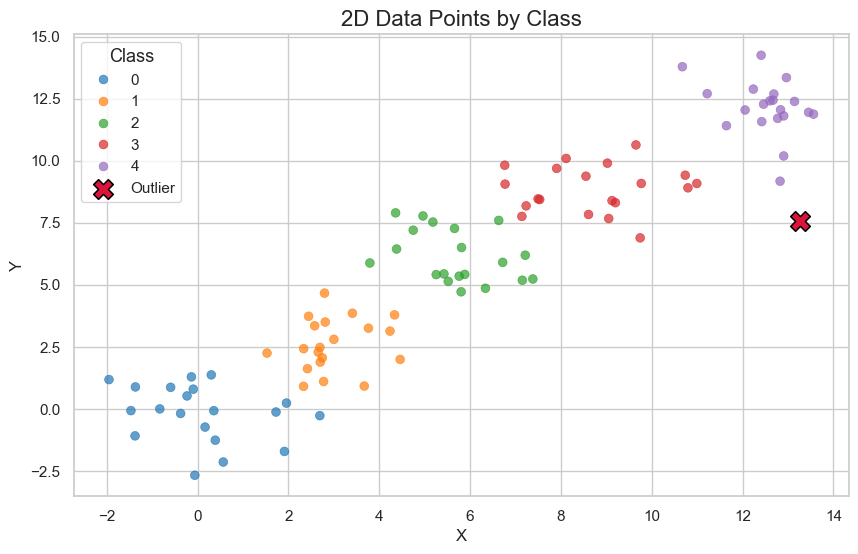

Class Prediction: 3


In [281]:
#np.random.seed(42)
knn =  knn_classifier(create_data_point(), "euclidean", k=10)
print(create_sample(df))
predict_class = knn.predict(create_sample(df),visualize=True)
print(f'Class Prediction: {predict_class}')

In [262]:
create_sample(df)

(3.907847670301081, 4.5817109879201094)